In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import seaborn as sns

import pmagpy.ipmag as ipmag

from scripts.auxiliar import get_files_in_directory, GCD_cartesian

In [2]:
def spherical2cartesian(v):
    """
    v[0] = theta - Latitude
    v[1] = phi - Longitude
    """
    
    x = np.cos(v[0]) * np.cos(v[1])  
    y = np.cos(v[0]) * np.sin(v[1])  
    z = np.sin(v[0])  
    
    return [x,y,z]

def cartesian2spherical(v):  
    """
    Take an array of lenght 3 correspoingt to a 3-dimensional vector and returns a array of lenght 2
    with latitade (inclination) and longitude (declination)
    """
    theta = np.arcsin(v[2]) 
    phi = np.arctan2(v[1], v[0])
        
    return [theta, phi]

In [3]:
current_path = os.getcwd() 
data_path = current_path + '/data'
data_path_PP = data_path + "/poles_NAM"

In [8]:
data_path_VGP = current_path + "/data/VGPs_NAM"

# this reads the names of all the files in the data path foldel we have
files_names = get_files_in_directory(data_path_VGP)
#files_names

In [9]:
current_path = os.getcwd() 
data_path = current_path + '/data'
data_path_PP = data_path + "/poles_NAM"
file_name = "/NAM_poles_0_130_pole_id.xlsx"
df_NAM = pd.read_excel(data_path_PP + file_name)

In [10]:
s = []
poles = []

for fname in files_names:      
    
    df_tmp = pd.read_excel(fname, skiprows = 5)
    
    df_tmp.insert(0, 'pole_id', fname.replace('.', '/').replace('\\', '/').split('/')[-2])
    df_tmp.insert(1, 'vgp_id', np.arange(1, df_tmp.shape[0] + 1))
    
    selected_df = df_tmp[(df_tmp['kept_by_auth'] == 'y') | (df_tmp['kept_by_auth'] == '2bdone') | (df_tmp['kept_by_auth'].isna())]
    
    # Calculates Pole statistics from vgps   
    ipmag.vgp_calc(selected_df, site_lon='slon', site_lat='slat', dec_tc='dec', inc_tc='inc')
    
    #CRITERIA: if there is no slat/slon in the paper, we get as 'true' the VGP reported in the paper
    selected_df.vgp_lat.fillna(selected_df.VGP_lat, inplace=True)
    selected_df.vgp_lon.fillna(selected_df.VGP_lon, inplace=True)
        
    selected_df['vgp_lat_SH'] = np.where(selected_df['vgp_lat'] > 0, -selected_df['vgp_lat'], selected_df['vgp_lat'])
    selected_df['vgp_lon_SH'] = np.where(selected_df['vgp_lat'] > 0,(selected_df['vgp_lon'] - 180.) % 360., selected_df['vgp_lon'])
     
    #CALCULATES FISHER STATISTICS FROM THE VGP LEVEL    
    mean_tmp = ipmag.fisher_mean(dec = selected_df['vgp_lon_SH'].tolist(), inc = selected_df['vgp_lat_SH'].tolist())
    mean_tmp['pole_id'] = fname.replace('.', '/').replace('\\', '/').split('/')[-2]
    
    
    
    poles.append(mean_tmp)    
    dfs.append(df_tmp)

df = pd.concat(dfs, ignore_index=True)
poles_from_vgps = pd.DataFrame(poles, index=df['pole_id'].unique().tolist())

In [11]:
# dfs = []
# poles = []

# for fname in files_names:      
   
#     df_tmp = pd.read_excel(fname, skiprows = 5)
    
#     df_tmp.insert(0, 'pole_id', fname.replace('.', '/').replace('\\', '/').split('/')[-2])
#     df_tmp.insert(1, 'vgp_id', np.arange(1, df_tmp.shape[0] + 1))
    
#     # Calculates Pole statistics from vgps   
#     ipmag.vgp_calc(df_tmp, site_lon='slon', site_lat='slat', dec_tc='dec', inc_tc='inc')
    
#     #CRITERIA: if there is no slat/slon in the paper, we get as 'true' the VGP reported in the paper
#     df_tmp.vgp_lat.fillna(df_tmp.VGP_lat, inplace=True)
#     df_tmp.vgp_lon.fillna(df_tmp.VGP_lon, inplace=True)
        
#     df_tmp['vgp_lat_SH'] = np.where(df_tmp['vgp_lat'] > 0, -df_tmp['vgp_lat'], df_tmp['vgp_lat'])
#     df_tmp['vgp_lon_SH'] = np.where(df_tmp['vgp_lat'] > 0,(df_tmp['vgp_lon'] - 180.) % 360., df_tmp['vgp_lon'])
     
#     #CALCULATES FISHER STATISTICS FROM THE VGP LEVEL    
#     mean_tmp = ipmag.fisher_mean(dec = df_tmp['vgp_lon_SH'].tolist(),inc = df_tmp['vgp_lat_SH'].tolist())
#     mean_tmp['pole_id'] = fname.replace('.', '/').replace('\\', '/').split('/')[-2]
    
#     poles.append(mean_tmp)    
#     dfs.append(df_tmp)
#     print(fname)
# df = pd.concat(dfs, ignore_index=True)
# #poles_from_vgps = pd.DataFrame(poles, index=df['pole_id'].unique().tolist())

In [12]:
poles_from_vgps

,dec,inc,n,r,k,alpha95,csd,pole_id
1,11.970454,-86.115675,37,35.482370,23.721198,4.937948,16.630937,1
10,267.711248,-88.340153,17,16.623349,42.479588,5.536743,12.427818,10
11,187.769496,-86.874229,23,22.121252,25.035633,6.171164,16.188467,11
12,260.866505,-84.817131,48,45.217128,16.889026,5.158687,19.709823,12
13,25.075019,-84.927825,22,20.828065,17.919078,7.531684,19.134944,13
14,287.725892,-79.853402,30,27.691883,12.564353,7.722963,22.851513,14
16,332.790436,-83.749087,19,18.682096,56.620811,4.499045,10.764577,16
18,188.636169,-88.405444,11,10.568499,23.174898,9.687867,16.825815,18
2,42.690352,-83.095837,8,7.776520,31.322757,10.051793,14.472882,2
20,345.631811,-81.610521,45,41.113501,11.321242,6.616455,24.073431,20


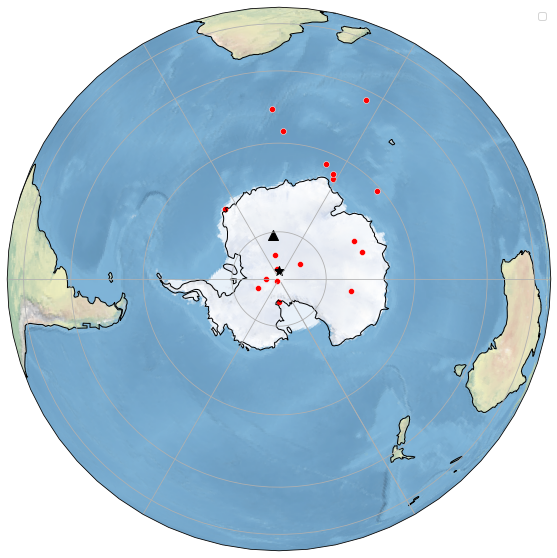

In [13]:
pole_id = 25

pole_vgps = poles_from_vgps[poles_from_vgps['pole_id'] == str(pole_id)]
vgps = df[df['pole_id'] == str(pole_id)]
pole_reference = df_NAM[df_NAM['pole_id'] == pole_id]

fig = plt.figure(figsize=(20,10))

proj = ccrs.Orthographic(30, -90)#Robinson()

ax = plt.axes(projection=proj)    
ax.coastlines()
ax.stock_img()
ax.gridlines()

sns.scatterplot(x = vgps['vgp_lon_SH'], y = vgps['vgp_lat_SH'],
                color = "red",                
                transform = ccrs.PlateCarree())

plt.scatter(x =pole_vgps['dec'], y = pole_vgps['inc'], marker ="*", 
            s = 100, color = "black", 
            transform = ccrs.PlateCarree())

plt.scatter(x =pole_reference['plon'], y = pole_reference['plat'], marker ="^", 
            s = 100, color = "black", 
            transform = ccrs.PlateCarree())

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))
plt.show()

In [14]:
GCDs = []
ID = []
for _, i in poles_from_vgps.iterrows():
        
    pole_vgps = poles_from_vgps[poles_from_vgps['pole_id'] == str(i.pole_id)]
    pole_reference = df_NAM[df_NAM['pole_id'] == int(i.pole_id)]
    
    
    cart_ref = (spherical2cartesian([np.radians(pole_reference['plat'].values)[0],np.radians(pole_reference['plon'].values)[0]]))
    cart_vgps = (spherical2cartesian([np.radians(pole_vgps['inc'].values)[0], np.radians(pole_vgps['dec'].values)[0]]))
    
    GCDs.append(GCD_cartesian(cart_ref,cart_vgps)*180/np.pi)
    ID.append(int(i.pole_id))
    
dictionary = {'id':ID, 'gcds': GCDs}
df = pd.DataFrame(dictionary)

df
# fig = plt.figure(figsize=(15,5))
# plt.scatter(ID, GCDs)
# plt.show()

,id,gcds
0,1,0.453530
1,10,0.514576
2,11,0.025825
3,12,0.494393
4,13,1.107211
5,14,4.372846
6,16,1.769220
7,18,1.305846
8,2,1.338717
9,20,2.299192


<AxesSubplot:xlabel='id', ylabel='gcds'>

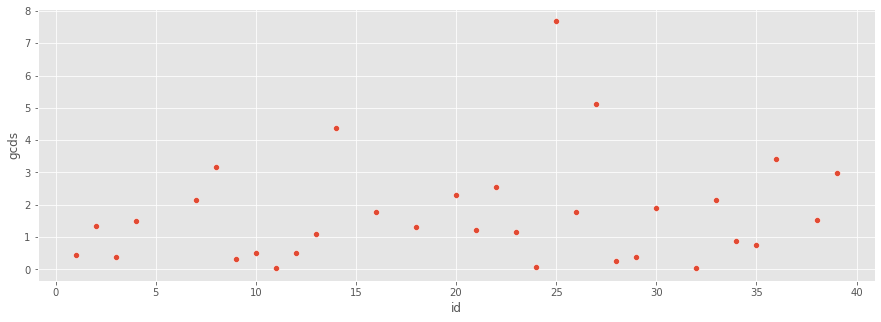

In [15]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x="id", y='gcds')

In [11]:
df_tmp = pd.read_excel('C:\\Dropbox\\TRABAJOS\\2021_YOUNG_CEED\\Young_CEED_2.0/data/VGPs_NAM\\19.xlsx', skiprows = 5)
    
df_tmp.insert(0, 'pole_id', fname.replace('.', '/').replace('\\', '/').split('/')[-2])
df_tmp.insert(1, 'vgp_id', np.arange(1, df_tmp.shape[0] + 1))

# Calculates Pole statistics from vgps   
ipmag.vgp_calc(df_tmp, site_lon='slon', site_lat='slat', dec_tc='dec', inc_tc='inc')

#CRITERIA: if there is no slat/slon in the paper, we get as 'true' the VGP reported in the paper
df_tmp.vgp_lat.fillna(df_tmp.VGP_lat, inplace=True)
df_tmp.vgp_lon.fillna(df_tmp.VGP_lon, inplace=True)

df_tmp['vgp_lat_SH'] = np.where(df_tmp['vgp_lat'] > 0, -df_tmp['vgp_lat'], df_tmp['vgp_lat'])
df_tmp['vgp_lon_SH'] = np.where(df_tmp['vgp_lat'] > 0,(df_tmp['vgp_lon'] - 180.) % 360., df_tmp['vgp_lon'])

#CALCULATES FISHER STATISTICS FROM THE VGP LEVEL    
mean_tmp = ipmag.fisher_mean(dec = df_tmp['vgp_lon_SH'].tolist(),inc = df_tmp['vgp_lat_SH'].tolist())
mean_tmp['pole_id'] = fname.replace('.', '/').replace('\\', '/').split('/')[-2]

df_tmp['dec'][0:70]
#mean_tmp['dec']

0     126.0
1      97.0
2     195.0
3     207.0
4     195.0
5     198.0
6      97.0
7     126.0
8     112.0
9     136.0
10     93.0
11    100.0
12    101.0
13    171.0
14    142.0
15    117.0
16    175.0
17    162.0
18    163.0
19     21.0
20    342.0
21     32.0
22     21.0
Name: dec, dtype: float64

In [64]:
mean_tmp = ipmag.fisher_mean(dec = df_tmp['vgp_lon_SH'].tolist(),inc = df_tmp['vgp_lat_SH'].tolist())
mean_tmp

{'dec': nan,
 'inc': nan,
 'n': 70,
 'r': nan,
 'k': nan,
 'alpha95': nan,
 'csd': nan}

In [74]:
df_tmp['dec']

0       1.9
1     355.4
2     341.1
3     329.4
4     349.9
      ...  
65    162.7
66    358.0
67      8.6
68    159.9
69      NaN
Name: dec, Length: 70, dtype: float64

In [43]:
df_tmp = pd.read_excel('C:\\Dropbox\\TRABAJOS\\2021_YOUNG_CEED\\Young_CEED_2.0/data/VGPs_NAM\\7.xlsx', skiprows = 5)

df_tmp.insert(0, 'pole_id', fname.replace('.', '/').replace('\\', '/').split('/')[-2])
df_tmp.insert(1, 'vgp_id', np.arange(1, df_tmp.shape[0] + 1))

#selected_df = df_tmp[df_tmp['kept_by_auth'] == 'y' & df_tmp['kept_by_auth'] == '2bdone']

# Calculates Pole statistics from vgps   
ipmag.vgp_calc(df_tmp, site_lon='slon', site_lat='slat', dec_tc='dec', inc_tc='inc')

#CRITERIA: if there is no slat/slon in the paper, we get as 'true' the VGP reported in the paper
df_tmp.vgp_lat.fillna(df_tmp.VGP_lat, inplace=True)
df_tmp.vgp_lon.fillna(df_tmp.VGP_lon, inplace=True)

df_tmp['vgp_lat_SH'] = np.where(df_tmp['vgp_lat'] > 0, -df_tmp['vgp_lat'], df_tmp['vgp_lat'])
df_tmp['vgp_lon_SH'] = np.where(df_tmp['vgp_lat'] > 0,(df_tmp['vgp_lon'] - 180.) % 360., df_tmp['vgp_lon'])

#CALCULATES FISHER STATISTICS FROM THE VGP LEVEL    
mean_tmp = ipmag.fisher_mean(dec = df_tmp['vgp_lon_SH'].tolist(),inc = df_tmp['vgp_lat_SH'].tolist())
mean_tmp['pole_id'] = fname.replace('.', '/').replace('\\', '/').split('/')[-2]

selected_df = df_tmp[(df_tmp['kept_by_auth'] == 'y') | (df_tmp['kept_by_auth'] == '2bdone')]
selected_df['kept_by_auth']

0     y
2     y
3     y
4     y
6     y
10    y
11    y
12    y
13    y
14    y
15    y
16    y
17    y
19    y
20    y
21    y
22    y
23    y
24    y
26    y
27    y
28    y
29    y
30    y
31    y
32    y
33    y
34    y
35    y
Name: kept_by_auth, dtype: object

In [9]:
df_tmp = pd.read_excel('C:\\Dropbox\\TRABAJOS\\2021_YOUNG_CEED\\Young_CEED_2.0/data/VGPs_NAM\\8.xlsx', skiprows = 5)
    
df_tmp.insert(0, 'pole_id', fname.replace('.', '/').replace('\\', '/').split('/')[-2])
df_tmp.insert(1, 'vgp_id', np.arange(1, df_tmp.shape[0] + 1))

# Calculates Pole statistics from vgps   
ipmag.vgp_calc(df_tmp, site_lon='slon', site_lat='slat', dec_tc='dec', inc_tc='inc')

#CRITERIA: if there is no slat/slon in the paper, we get as 'true' the VGP reported in the paper
df_tmp.vgp_lat.fillna(df_tmp.VGP_lat, inplace=True)
df_tmp.vgp_lon.fillna(df_tmp.VGP_lon, inplace=True)

df_tmp['vgp_lat_SH'] = np.where(df_tmp['vgp_lat'] > 0, -df_tmp['vgp_lat'], df_tmp['vgp_lat'])
df_tmp['vgp_lon_SH'] = np.where(df_tmp['vgp_lat'] > 0,(df_tmp['vgp_lon'] - 180.) % 360., df_tmp['vgp_lon'])

#CALCULATES FISHER STATISTICS FROM THE VGP LEVEL    
mean_tmp = ipmag.fisher_mean(dec = df_tmp['vgp_lon_SH'].tolist(),inc = df_tmp['vgp_lat_SH'].tolist())
mean_tmp['pole_id'] = fname.replace('.', '/').replace('\\', '/').split('/')[-2]

In [9]:
mean_tmp

{'dec': 354.32767508459125,
 'inc': -85.28946692696941,
 'n': 51,
 'r': 48.98951290734434,
 'k': 24.869595125803492,
 'alpha95': 4.07974097817379,
 'csd': 16.242417193825418,
 'pole_id': '9'}

In [11]:
df.columns

Index(['pole_id', 'vgp_id', 'Name', 'slat', 'slon', 'n', 'dec', 'inc', 'k',
       'α95', 'VGP_lat', 'VGP_lon', 'K', 'dp', 'dm', 'A95', 'age', '2_sigma',
       'min_age', 'max_age', 'error_dist', 'lithology', 'Q', 'kept_by_auth',
       'ref', 'age ref', 'comments (Q breakdown)', 'paleolatitude', 'vgp_lat',
       'vgp_lon', 'vgp_lat_rev', 'vgp_lon_rev', 'vgp_lat_SH', 'vgp_lon_SH',
       'dip_dir', 'dip', 'Unnamed: 24'],
      dtype='object')

In [7]:
df[df['kept_by_auth'] == 48]
df['kept_by_auth'].unique()

array(['y', 'n', '2bdone'], dtype=object)

In [24]:
df[df['kept_by_auth'] == 'yes']['pole_id'].unique()

array(['22'], dtype=object)